<center><span style="font-size:25px;">СЕГМЕНТАЦИЯ ИНТЕРЕСОВ ПОДРОСТКОВ</span></center>

<img src='data/pics/descr.png' width='70%' style='display:block; margin:auto'>

<h2 id='contents'>Оглавляшка:</h2>

<center><span style="font-size:25px;">Практика по KMeans и EM-алгоритму</span></center> 

* [Загружаемые библиотеки](#libs)
* [Знакомство с данными](#intro)
* [Отбор необходимых признаков](#fselection)
* [Масштабирование через StandardScaler](#scaling)
* [Реализация KMeans о девяти кластерах](#simplekmeans)
* [Подбор кластеров по заданному диапазону](#optimalclustersearch) через силуэт (silhouette) и локоть (inertia)
* [Реализация KMeans о 3-х кластерах](#kmeansthreeclust)
* [EM-алгоритм GaussianMixture о 3-х кластерах](#gamix)
* [Слежка за одиноким подростком](#ex_4_8) странное задание

## Загружаемые библиотеки <a id='libs'></a>

In [1]:
from data.functions_akialema import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

plt.style.use('seaborn-v0_8') #стиль отрисовки seaborn
%matplotlib inline

## Знакомство с данными <a id='kmeans'></a>

In [2]:
df = pd.read_csv('https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1iOeCmxvkTdOI8wsvWJ5UtKbD0bGSKKE_')

my_info(df)

memory usage: 11.0 MB


,column,num of unique vals,type,mode,number of entries,NaN vals,number of dublics,describe
0,gender,2,object,F,30000,2724,650,see type column
1,gradyear,4,int64,2006,30000,0,650,min...: 2006.00max..: 2009.00mean: 2007.50std....: 1.12
2,abercrombie,9,int64,0,30000,0,650,min...: 0.00max..: 8.00mean: 0.05std....: 0.28
3,bible,9,int64,0,30000,0,650,min...: 0.00max..: 11.00mean: 0.02std....: 0.20
4,clothes,9,int64,0,30000,0,650,min...: 0.00max..: 8.00mean: 0.15std....: 0.47
5,dress,9,int64,0,30000,0,650,min...: 0.00max..: 9.00mean: 0.11std....: 0.45
6,drunk,9,int64,0,30000,0,650,min...: 0.00max..: 8.00mean: 0.09std....: 0.40
7,cheerleading,10,int64,0,30000,0,650,min...: 0.00max..: 9.00mean: 0.11std....: 0.51
8,hollister,10,int64,0,30000,0,650,min...: 0.00max..: 9.00mean: 0.07std....: 0.35
9,hot,10,int64,0,30000,0,650,min...: 0.00max..: 10.00mean: 0.13std....: 0.48


Датасет приятный, все признаки числового формата, кроме признака половой принадлежности.  
Наблюдается наличие 650 дублей и 7810 пропусков в двух столбцах: `gender` и `age`.

## Отбор необходимых признаков <a id='fselection'></a>

[↑ contents](#contents)

Мы будем реализовывать алгоритм только на признаках, которые заключают в себе ключевые слова, встречающиеся в сообщениях подростка. Удалите все остальные признаки. Какова размерность вашего текущего набора данных?

In [77]:
df2 = df.loc[:, ~df.columns.isin(['gradyear', 'gender', 'age', 'friends'])]
print('Текущая размерность: {} строк и {} столбцов'.format(*df2.shape))

Текущая размерность: 30000 строк и 36 столбцов


## Масштабирование через StandardScaler <a id='scaling'></a>

[↑ contents](#contents)

Теперь нормализуйте данные с помощью `StandardScaler()`. Для получившейся матрицы нормализованных признаков выведите самое первое значение в самой первой строке (`X_norm[0][0]`). Ответ округлите до двух знаков после точки-разделителя.

In [78]:
df_scaled = StandardScaler().fit_transform(df2)

print(f"Ответ на вопрос: {df_scaled[0][0]:.2f}")

Ответ на вопрос: -0.33


## Реализация KMeans о девяти кластерах <a id='simplekmeans'></a>

[↑ contents](#contents)  
<pre>-------</pre>

[Обратно к 4.8](#ex_4_8)

Реализуйте алгоритм `k-means` c девятью кластерами. В качестве значения параметра `random_state` возьмите число `42`. Выведите получившееся значение инерции (`model.inertia_`). Ответ округлите до двух знаков после точки-разделителя.

In [79]:
kmeans_9 = KMeans(n_clusters=9, n_init='auto', random_state=42)
kmeans_9.fit(df_scaled)

print(f"{kmeans_9.inertia_:.2f} <-- Значение инерции для такой модели")
print(f"{pd.Series(kmeans_9.labels_).value_counts().max()}     <-- Столько подростков относится к наиболее многочисленному кластеру")
print(f"{pd.Series(kmeans_9.labels_).value_counts().min()}         <-- А столько — к самому малочисленному")

856276.70 <-- Значение инерции для такой модели
19599     <-- Столько подростков относится к наиболее многочисленному кластеру
1         <-- А столько — к самому малочисленному


## Подбор кластеров по заданному диапазону <a id='optimalclustersearch'></a>

[↑ contents](#contents)

1. Мы выделили девять кластеров, но, возможно, это далеко не оптимальное количество. Давайте попробуем применить разные методы для нахождения числа кластеров. Будем выбирать количество кластеров из диапазона от `3` до `9`.  
Для начала примените `метод локтя`.  
<br />Каким в этом случае будет оптимальное число кластеров?  
(Если оно не идентифицируется однозначно, запишите количество кластеров, при котором достигается <span style='color:gold'>наименьшая инерция</span>.)

2. Теперь попробуйте подобрать оптимальное количество кластеров с помощью `коэффициента силуэта`.  
<br />Каким оно будет?  
(Если невозможно однозначно определить количество кластеров, при котором достигается <span style='color:gold'>максимальное значение коэффициента силуэта</span>, выберите наименьшее количество кластеров из подходящих.)

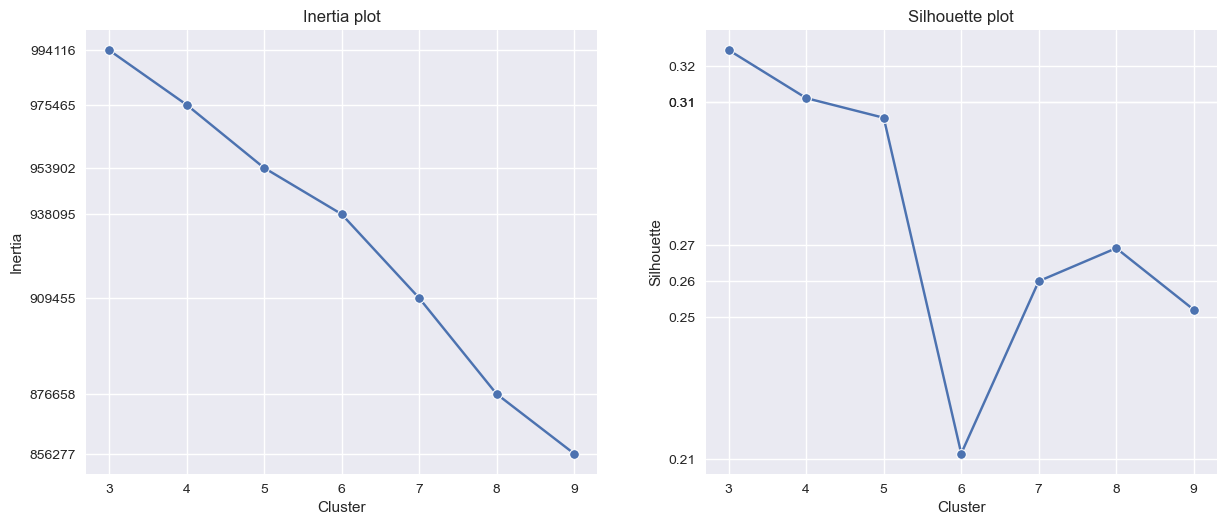

In [80]:
inertia_silhouette_plot(df_scaled, KMeans(n_init='auto', random_state=42), cluster_range=(3, 10), coef='i+s').show()

## Реализация KMeans о 3-х кластерах <a id='kmeansthreeclust'></a>

[↑ contents](#contents)

Мы будем использовать результаты, полученные в предыдущем задании с помощью коэффициента силуэта.

Реализуйте сегментацию подростков на выбранном количестве кластеров.

Для каждого кластера составьте `топ-10` самых частых слов, назовём их ключевыми. Для этого сгруппируйте данные по кластерам, в каждом кластере вычислите среднее по каждому признаку, отсортируйте данные по убыванию и выделите первые 10 строк.

Найдите среди ключевых слов те, которые характерны для каждого кластера, то есть встречаются в каждом из них.

In [81]:
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=42)
kmeans.fit(df_scaled)

df_for_this_cell = pd.concat([df2, pd.Series(kmeans.labels_, name='cluster')], axis=1)

df_for_loop = pd.DataFrame()
for i in df_for_this_cell.groupby('cluster').mean().iterrows():
    df_for_loop[i[0]] = pd.Series(pd.Series(i[1]).sort_values(ascending=False).head(10).sort_index().index)

var_for_ans = set(df_for_loop[0]) & set(df_for_loop[1]) & set(df_for_loop[2])
print('{}, {}, {}, {} <--- ключевые слова, которые встречаются в каждом из кластеров'.format(*var_for_ans))

hair, music, god, dance <--- ключевые слова, которые встречаются в каждом из кластеров


## EM-алгоритм GaussianMixture о 3-х кластерах <a id='gamix'></a>

[↑ contents](#contents)

Итак, с k-means мы потренировались — теперь перейдём к EM-алгоритму.

Реализуйте EM-алгоритм (`GaussianMixture`) для такого же количества кластеров, как и в предыдущем задании. В качестве значения параметра `random_state` возьмите число `42`.

Сколько подростков алгоритм отнёс к самому многочисленному кластеру?

In [82]:
gamixtu = GaussianMixture(n_components=3, random_state=42)
gamixtu.fit(df_scaled)

print(f"{pd.Series(gamixtu.predict(df_scaled)).value_counts().max()} <--- столько подростков алгоритм отнёс к самому многочисленному кластеру")

20670 <--- столько подростков алгоритм отнёс к самому многочисленному кластеру


## Слежка за одиноким подростком <a id='ex_4_8'></a>

[↑ contents](#contents)

В одном из кластеров оказался всего один человек ([вот здесь](#simplekmeans)). Давайте узнаем, что это за подросток и чем он(а) интересуется.

Отметьте три слова, которые чаще всего встречаются в сообщениях этого подростка:

In [83]:
df_for_this_cell = pd.concat([df2, pd.Series(kmeans_9.labels_, name='cluster')], axis=1)

print('{}, {}, {} <-- топ три слова от одиночки'.format(*df_for_this_cell.query(f"cluster == {df_for_this_cell['cluster'].value_counts().idxmin()}").reset_index(drop=True).T.sort_values(by=0, ascending=False).head(3).index))

blonde, sex, hair <-- топ три слова от одиночки


[↑ contents](#contents)